In [32]:
import numpy as np
import pandas as pd

import missingno as mno

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import lines, patches
import seaborn as sns

import folium
from folium.plugins import HeatMap

import plotly.express as px
import plotly.graph_objects as go

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# `Context`

## Domain Knowledge
* How Airbnb works: https://www.igms.com/airbnb-business-model/#:~:text=The%20Airbnb%20business%20model%20is%20a%20two%2Dsided%20marketplace%20that,property%20owner%20for%20each%20booking.
* The majority of its revenue comes from **service fees from bookings** charged to both guests and hosts (https://www.investopedia.com/articles/investing/112414/how-airbnb-makes-money.asp#:~:text=The%20majority%20of%20its%20revenue,IPO%20at%20%2468%20a%20share.)
* Airbnb service fees (https://www.airbnb.com/help/article/1857):
    * Split Fee
        * Host (3%)
        * Guest (14.2%)
    * Host Only (14–16%)
* Why People travel to Bangkok? Bangkok has attracted millions of visitors annually for decades, offering tourists an incredible experience of cultural tradition-meets-modernity. It’s got world-class food, stunning historical landmarks, and some of the best hospitality around the globe. (https://theculturetrip.com/asia/thailand/articles/11-amazing-reasons-to-visit-bangkok-thailand/)
* Best Things to do in Bangkok: https://www.tripadvisor.com/Attractions-g293916-Activities-Bangkok.html
* Bangkok Lattitude, Longitude : 13.7563° N, 100.5018° E
* AirBNB paling mahal di Thailand: 22,324 USD / 835,632 THB (https://www.smoney.com.au/blog/the-most-expensive-airbnb-in-every-country/)
* The average price of a night in a vacation rental in in Bangkok is $33 / 1,164 THB (https://www.likibu.com/short-term-rental/bangkok)
* kurs USD to THB: 1 USD = 37.432 THB (period: 06/11/2022, https://www.exchangerates.org.uk/USD-THB-06_11_2022-exchange-rate-history.html)
* How's the minimum nights rules in Thailand?
    * by rules non-hotel can't do short term rental (minimum 30 days) (https://www.thethailandlife.com/airbnb-thailand#:~:text=Should%20I%20still%20go%20ahead,you%20stay%20within%20the%20law.)
    * it can be legal if they have received an official exemption from the 2008 Thailand Hotel Act. (https://web.facebook.com/notes/3127419484030843/?_rdc=1&_rdr)
    * 86.2% short-term rentals (below 30 minimum nights) (period checking: 01/07/2023 , http://insideairbnb.com/bangkok/#)
* City Data (https://airbtics.com/airbnb-occupancy-rates-by-city/):
    * Number of Airbnb listings: 14,443
    * Number of VRBO listings: 1,365 
    * Average Occupancy Rate: 23% 
    * Average Nightly Rate: $57 
    * Annual Revenue: $5,328 
    * International Traveller Ratio: 75% 
    * Biggest travellers origin: USA
    * Biggest domestic travellers origin: Bangkok
    * Most common guests language: English 
    * Peak season: February

## Problem
**Add new property which have high-performance characteristics**
* Airbnb want to increase the revenue in Bangkok 
* How to do is add the most potential property
* Because of that, **Airbnb want to Know high-performance property**
* Benefit of this information such as:
    - Decrease cost and time for property searching
    - Improve property listing qualities
    - Help grouping the property
* Question for Data Analyst: 
    - **How's the performance of Airbnb property in Bangkok?**
    - **How's the characteristics of high-performances property?**
    - **How's the recommendation to improve?**

## Stakeholder
* Business Development Manager
* Account Manager

# `Analysis`

In [33]:
# load data
bnb = pd.read_csv(r'./data/processed/cleaned_data.csv')
bnb.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,listing_url,host_response_time,host_response_rate,accommodates,amenities,review_scores_rating,accommodates_type,estimated_bookings_per_month,property_performance,price_class,term_type
0,27934,Nice room with superb city view,120437,Nuttee,Ratchathewi,13.75983,100.54134,Entire home/apt,1905,3,65,2020-01-06,0.50,2,353,0,https://www.airbnb.com/rooms/27934,within an hour,100.0,3,"[""Shampoo"", ""Kitchen"", ""Fire extinguisher"", ""F...",4.85,family,0.50,low,1400.0 - 2400.0,short-terms
1,27979,"Easy going landlord,easy place",120541,Emy,Bang Na,13.66818,100.61674,Private room,1316,1,0,NaN,0.00,2,358,0,https://www.airbnb.com/rooms/27979,a few days or more,0.0,2,"[""Pool"", ""Washer"", ""First aid kit"", ""Heating"",...",NaN,single/couple,0.00,low,900.0 - 1400.0,short-terms
2,28745,modern-style apartment in Bangkok,123784,Familyroom,Bang Kapi,13.75232,100.62402,Private room,800,60,0,NaN,0.00,1,365,0,https://www.airbnb.com/rooms/28745,no information,NaN,2,"[""Long term stays allowed""]",NaN,single/couple,0.00,low,< 900.0,long-terms
3,35780,Spacious one bedroom at The Kris Condo Bldg. 3,153730,Sirilak,Din Daeng,13.78823,100.57256,Private room,1286,7,2,2022-04-01,0.03,1,323,1,https://www.airbnb.com/rooms/35780,within an hour,100.0,2,"[""Clothing storage: closet and dresser"", ""Blen...",4.50,single/couple,0.03,low,900.0 - 1400.0,short-terms
4,941865,Suite Room 3 at MetroPoint,610315,Kasem,Bang Kapi,13.76872,100.63338,Private room,1905,1,0,NaN,0.00,3,365,0,https://www.airbnb.com/rooms/941865,within an hour,100.0,2,"[""Washer"", ""Air conditioning"", ""Breakfast"", ""K...",NaN,single/couple,0.00,low,1400.0 - 2400.0,short-terms


## Property performance

> Question:
* How's airbnb property performance in Bangkok?

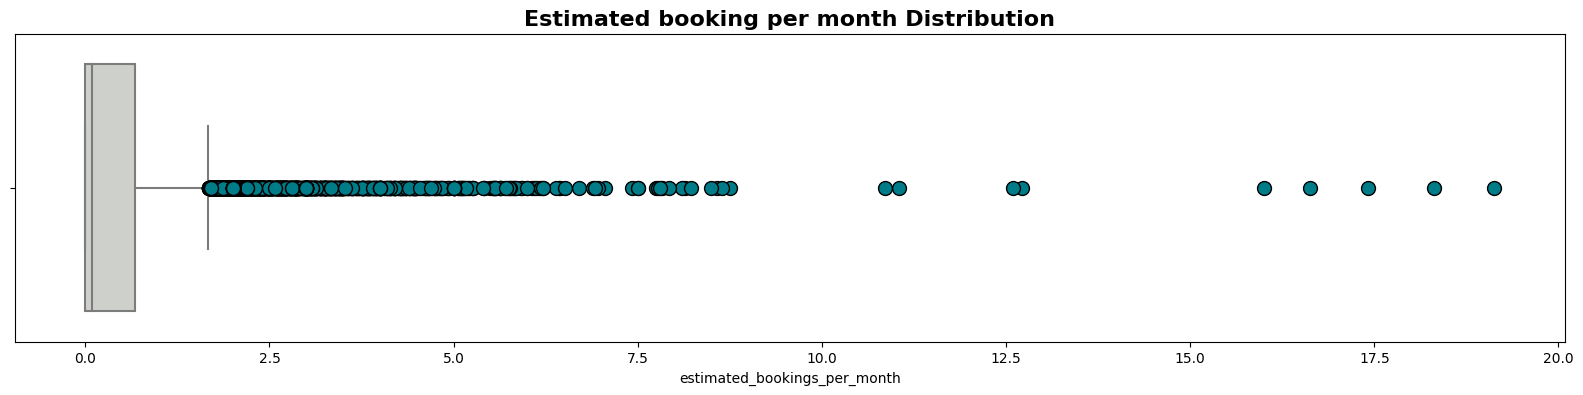

In [34]:
plt.figure(figsize=(20,4))

flierprops = dict(marker='o', markersize=10, markeredgecolor='black', markerfacecolor='#007b88')

p = sns.boxplot(data=bnb, x='estimated_bookings_per_month', hue='property_performance', color='#ced1cb', flierprops=flierprops)
p.set_title('Estimated booking per month Distribution', fontsize= 16, fontweight='bold');

* **estimated_bookings_per_month** is used as a base to determine property_performance 
* Using IQR Method, we can categorize performance into:
    * *high* : property which have **estimated_bookings_per_month** more than or equal to upper bound (outliers)
    * *low* : property which have **estimated_bookings_per_month** less than upper bound

In [35]:
# check the high and low reviews proportion

perfPor = bnb.property_performance.value_counts()
perfPor

property_performance
low     14375
high     1471
Name: count, dtype: int64

''

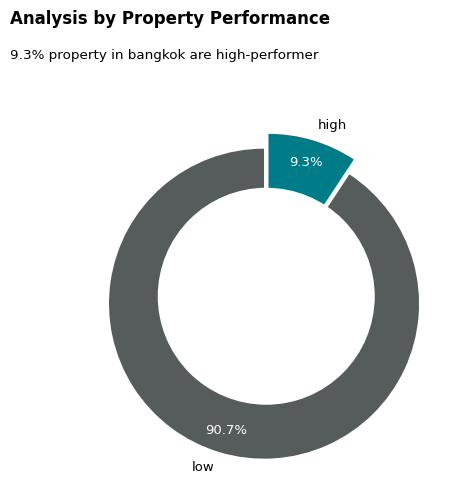

In [36]:
# initialize plot
fig, ax = plt.subplots(figsize=(5, 5))

# adjust the subplot so that the title would fit
plt.subplots_adjust(top=0.9)

# add title
fig.text(
    0, 1.05, "Analysis by Property Performance", 
    fontsize=12,
    fontweight="bold", 
)

# add subtitle
fig.text(
    0, 0.98, 
    "9.3% property in bangkok are high-performer",
    fontsize=9.7, 
    color='black'
)

# create pie chart
_, _, autotexts = plt.pie(perfPor, 
        colors=['#565b5c', "#007b88"],
        labels=perfPor.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        pctdistance=0.85, 
        explode=(0.05, 0.05),
        textprops = {"fontsize": 9.5},
)

# adjust auto pct colours
for autotext in autotexts:
    autotext.set_color('white')

# create a circle at the center of the plot
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0, 0), 0.7, fc='white'))

# # saving figure
# plt.savefig('../reports/figures/station.jpg', bbox_inches='tight')+

# # show
# plt.tight_layout()
# plt.show()
;

Only **1471 (9.3%)** property in bangkok are **high-performer**

## High-Performance Property Characteristics

### Based on Property Type
> Question:
* What is accommodates type with the most high performer property?
* What is room type with the most high performer property?

In [37]:
# pivot table

bnb_lf = pd.crosstab(bnb.accommodates_type, bnb.property_performance)

bnb_lf_percent = (bnb_lf.div(bnb_lf.sum(axis=1), axis=0) * 100).sort_values('high', ascending=False).round(2)

display(bnb_lf.sort_values('high', ascending=False), bnb_lf_percent)

property_performance,high,low
accommodates_type,,
family,741,5555
single/couple,730,8820


property_performance,high,low
accommodates_type,,
family,11.77,88.23
single/couple,7.64,92.36


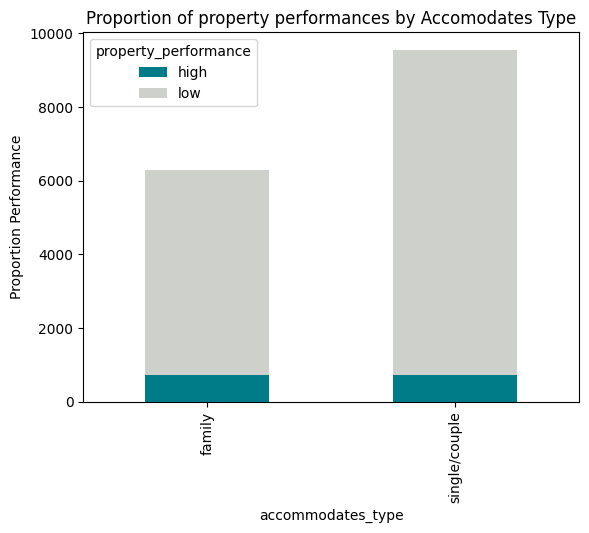

In [38]:
# creat barchart
bnb_lf.plot(kind='bar', stacked=True, color=["#007b88", '#ced1cb'])

# set title
plt.ylabel(f'Proportion Performance')
plt.title('Proportion of property performances by Accomodates Type');

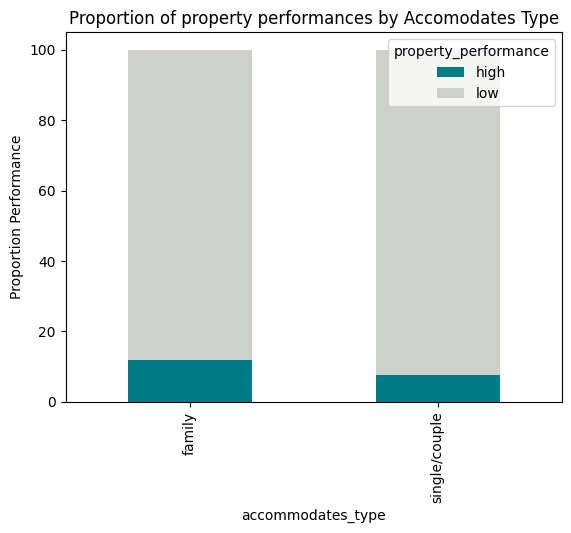

In [39]:
# creat barchart
bnb_lf_percent.plot(kind='bar', stacked=True, color=["#007b88", '#ced1cb'])

# set title
plt.ylabel(f'Proportion Performance')
plt.title('Proportion of property performances by Accomodates Type');

In [89]:
# sunburst

fig = px.sunburst(
    bnb, 
    path=['accommodates_type', 'property_performance'], 
    title=f'Proportion of Property Performance by Room Type', 
    width=600, 
    height=600
    )

fig.update_traces(textinfo="label+percent parent")  

fig.show()

In [40]:
# statistical test
from statsmodels.stats.proportion import proportions_ztest

stats, pval=proportions_ztest(bnb_lf['high'], bnb_lf.sum(axis=1),alternative='larger')

pval = pval/2
if pval<=0.05:
    print(f'''Reject Ho \nThe proportion is SIGNIFICANTLY DIFFERENT \nProportion of high-performance family MORE THAN single/couple''')
else:
    print(f'Accept Ho \nThe proportion is SIGNIFICANTLY NOT DIFFERENT \nProportion of high-performance family NOT MORE THAN single/couple')


Reject Ho 
The proportion is SIGNIFICANTLY DIFFERENT 
Proportion of high-performance family MORE THAN single/couple


* Proportion of family accommodation type is bigger than single/couple 

In [41]:
# room type
bnb_rt = pd.crosstab(bnb.room_type, bnb.property_performance)
bnb_rt.sort_values('high', ascending=False)

bnb_rt_percent = (bnb_rt.div(bnb_rt.sum(axis=1), axis=0) * 100).sort_values('high', ascending=False).round(2)

display(bnb_rt.sort_values('high', ascending=False), bnb_rt_percent)

property_performance,high,low
room_type,,
Entire home/apt,1179,7726
Private room,257,5513
Hotel room,31,617
Shared room,4,519


property_performance,high,low
room_type,,
Entire home/apt,13.24,86.76
Hotel room,4.78,95.22
Private room,4.45,95.55
Shared room,0.76,99.24


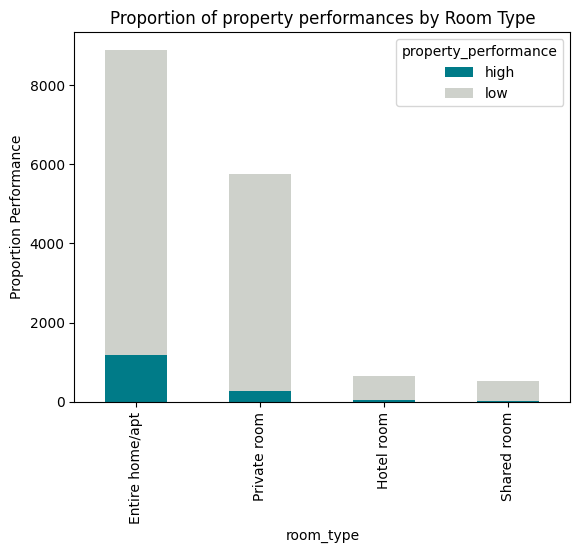

In [97]:
# creat barchart
bnb_rt.sort_values('high', ascending=False).plot(kind='bar', stacked=True, color=["#007b88", '#ced1cb'])

# set title
plt.ylabel(f'Proportion Performance')
plt.title('Proportion of property performances by Room Type');

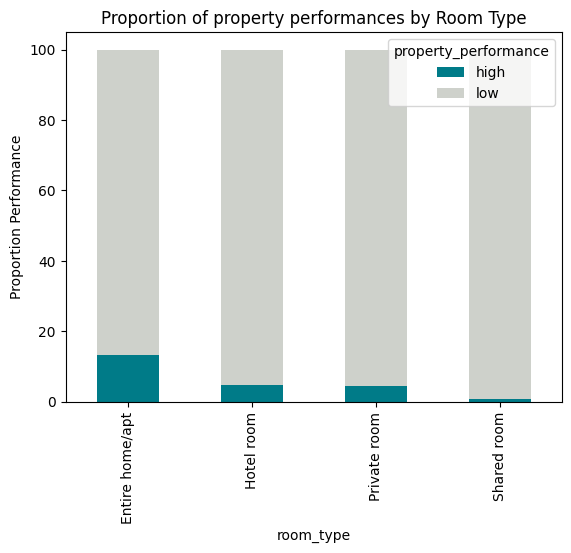

In [42]:
# creat barchart
bnb_rt_percent.plot(kind='bar', stacked=True, color=["#007b88", '#ced1cb'])

# set title
plt.ylabel(f'Proportion Performance')
plt.title('Proportion of property performances by Room Type');

In [88]:
# sunburst

fig = px.sunburst(
    bnb, 
    path=['room_type', 'property_performance'], 
    title=f'Proportion of Property Performance by Room Type', 
    width=600, 
    height=600
    )

fig.update_traces(textinfo="label+percent parent")  

fig.show()

* High performance proportion in entire home/apt is the highest
* Based on domain knowledge, travellers prefers to stay in entire home/apt because it offers more amenities
* Its also allign with the analysis before that says most travellers stay in Bangkok with family/group

### Based on Location

> Question:
* Where is the highperformer property located?
* Why do these locations have many high-performer properties?


In [44]:
# pivot table

bnb_ct = pd.crosstab(bnb.neighbourhood, bnb.property_performance)
bnb_ct['total'] = bnb_ct.sum(axis=1)
bnb_ct.sort_values('total', ascending=False).head(10)

property_performance,high,low,total
neighbourhood,,,
Vadhana,278,1872,2150
Khlong Toei,381,1714,2095
Huai Khwang,85,1037,1122
Ratchathewi,109,1005,1114
Bang Rak,87,740,827
Sathon,101,708,809
Phra Nakhon,58,561,619
Phra Khanong,27,531,558
Chatu Chak,27,521,548


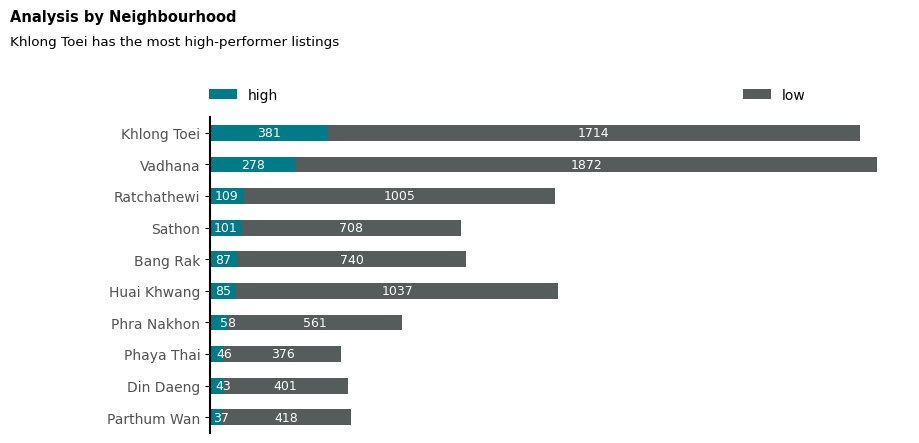

In [45]:
topBnb = bnb_ct.sort_values('high',ascending=False).head(10).drop(columns='total').sort_values('high')

# initialize plot
fig, ax = plt.subplots()

# adjust the subplot so that the title would fit
plt.subplots_adjust(top=0.9, left=0.2)

# add title
fig.text(
    0, 1.14, "Analysis by Neighbourhood", 
    fontsize=10.5,
    fontweight="bold", 
)

# # add subtitle
fig.text(
    0, 1.08, 
    "Khlong Toei has the most high-performer listings", 
    fontsize=9.7, 
    color='black'
)


topBnb.plot.barh(
    align='center', 
    stacked=True, 
    figsize=(10, 4), 
    color=["#007b88", '#565b5c'], 
    ax=ax
)

# add annotation value on the bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 

    if width > 60:
        X = x+width/2
        Y = y+height/2

    elif width != 0.0:
        X = x+width
        Y = y+height/2
    
    else:
        continue

    ax.text(
        X, Y, 
        '{:.0f}'.format(width), 
        horizontalalignment='center', 
        verticalalignment='center',
        color='white',
        fontsize=9)

# add legend
legend = plt.legend(
    loc='center',
    frameon=False,
    mode="expand",
    bbox_to_anchor=(0., 1.02, .85, .102), 
    ncol=4, 
    borderaxespad=-.46,
    prop={'size': 10})

# set whether axis ticks and gridlines are above or below most artists.
ax.set_axisbelow(True)

# customize axes spine
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_lw(1.5)

# customize ticks and label
plt.yticks(color='#525252')
plt.ylabel(ylabel=None)
plt.xticks(ticks=[])
plt.xlabel(xlabel=None);

* **Neighbourhood** with most **property** is **Vardhana**
* **Neighbourhood** with most **high-performer property** is **Khlong Toei**

In [46]:
# load additional data (famous place in bangkok)

fam = pd.read_excel('./data/raw/famous_place_in_bkk.xlsx')
fam['lat'] = fam.coord.apply(lambda x: x.split(', ')[0])
fam['lng'] = fam.coord.apply(lambda x: x.split(', ')[1])

# save to excel file
fam.to_excel('./data/processed/clean_fam_place_bkk.xlsx', index=False)

In [47]:
# plot the map

bkk_map = folium.Map(location=[13.7563, 100.5018], zoom_start=11, tiles='stamentoner')

bkk_gjson = "./data/raw/additional data/neighbourhoods.geojson"

# Choropleth
chor_nei = folium.Choropleth(
    geo_data= bkk_gjson,                                            # file geojson (data geospatial)
    # data= bnb_ct['high'].reset_index(),                           # dataframe pandas
    # columns= ['neighbourhood', 'high'],                           # kolom dataframe yg dipakai
    # key_on= 'feature.properties.neighbourhood',                   # indexing nama kelurahan dlm file geojson untuk join dengan dataframe pandas
    fill_color= 'orange',                                           # palette warna
    fill_opacity= 0.2,                                              # opacity isi polygon
    line_opacity= 0.2,                                              # opacity garis luar polygon
    # bins= bins_jumlah                                             # bins untuk legend
)

# Masukkan choropleth ke dalam peta bangkok
chor_nei.add_to(bkk_map)

# heatmap
HeatMap(bnb.query("property_performance == 'high'")[['latitude','longitude','estimated_bookings_per_month']], 
        min_opacity=0.4,
        blur = 18
               ).add_to(folium.FeatureGroup(name='Heat Map').add_to(bkk_map))
folium.LayerControl().add_to(bkk_map)

# create dataset famous place in bkk
tour = fam.query("type == 'Tourism'")
ap = fam.query("type == 'Airport'")

# buat marker tourism 
for i in tour.index:
    tourism = folium.Marker(
        location= tour.loc[i, ['lat','lng']],
        tooltip= tour.loc[i, 'type'],                     # label ketika dihover
        popup= f''' {tour.loc[i, 'name']} ''',
        icon= folium.Icon(
            color='darkblue', 
            icon='map',
            icon_color='white',
            prefix='fa'
        )
    )

    # memasukkan marker ke dalam peta
    tourism.add_to(bkk_map)

# buat marker airport 
for i in ap.index:
    airp = folium.Marker(
        location= ap.loc[i, ['lat','lng']],
        tooltip= ap.loc[i, 'type'],                     # label ketika dihover
        popup= f''' {ap.loc[i, 'name']} ''',
        icon= folium.Icon(
            color='black', 
            icon='plane',
            icon_color='white',
            prefix='fa'
        )
    )

    # memasukkan marker ke dalam peta
    airp.add_to(bkk_map)

bkk_map


- Based on the map, **most heat area is near with the CBD of bangkok**
- Because there are **near with many famous place that become travellers destination**

### Based on Price
> Question:
* Apakah traveler sentitif terhadap harga?


In [48]:
bnb_pr = pd.crosstab(bnb.price_class, bnb.property_performance)

bnb_pr_percent = (bnb_pr.div(bnb_pr.sum(axis=1), axis=0) * 100).sort_values('high', ascending=False).round(2)
display(bnb_pr.sort_values('high', ascending=False), bnb_pr_percent)

property_performance,high,low
price_class,,
1400.0 - 2400.0,514,3560
> 2400.0,418,3630
900.0 - 1400.0,319,3550
< 900.0,220,3635


property_performance,high,low
price_class,,
1400.0 - 2400.0,12.62,87.38
> 2400.0,10.33,89.67
900.0 - 1400.0,8.25,91.75
< 900.0,5.71,94.29


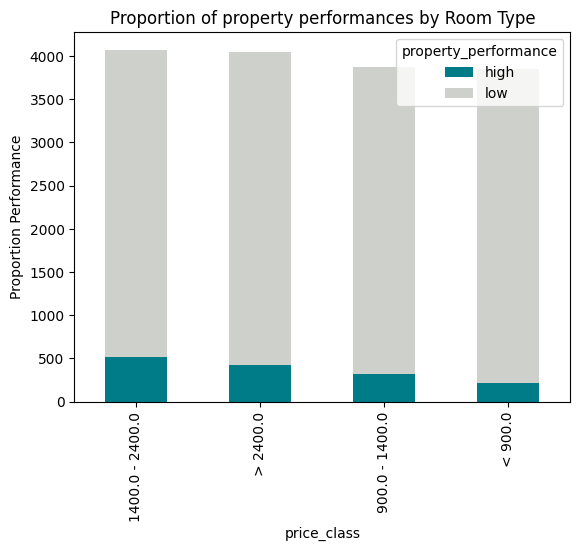

In [98]:
# creat barchart
bnb_pr.sort_values('high', ascending=False).plot(kind='bar', stacked=True, color=["#007b88", '#ced1cb'])

# set title
plt.ylabel(f'Proportion Performance')
plt.title('Proportion of property performances by Room Type');

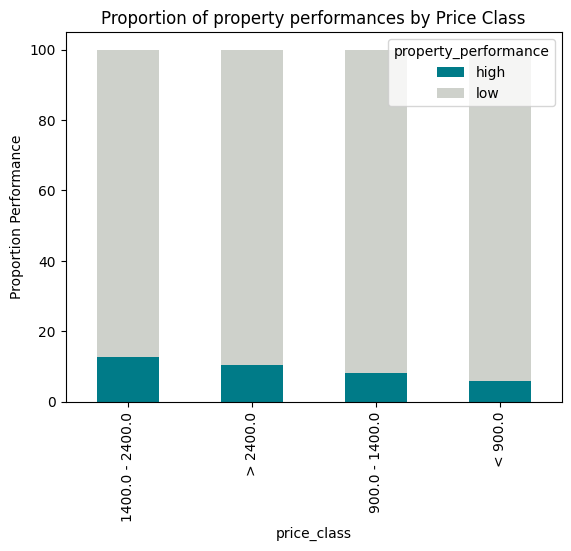

In [49]:
# creat barchart
bnb_pr_percent.plot(kind='bar', stacked=True, color=["#007b88", '#ced1cb'])

# set title
plt.ylabel(f'Proportion Performance')
plt.title('Proportion of property performances by Price Class');

In [93]:
# sunburst

fig = px.sunburst(
    bnb, 
    path=['price_class', 'property_performance'], 
    title=f'Proportion of Property Performance by Price Class', 
    width=600, 
    height=600
    )

fig.update_traces(textinfo="label+percent parent")  

fig.show()

* 2 highest price class (1400 - 2400 and > 2400) have the most proportion of high-performer property 
* It's means that **travelers tend to be price insensitive (Travelers are willing to pay more)**
* It's also allign with the domain knowledge that says 75% travellers in Bangkok come from abroad (mostly USA), where is the USD more powerfull compare to TBH 

### Based on Listing Facilities
> Question:
* What facilities are present in high-performance property but not in low-performance property?

In [50]:
# function
def flatFac(data):
    listFac = []
    for i in range(len(data)):
        listFac.extend(data[i].strip('[]').replace('"','').split(', '))

    facDf = pd.DataFrame(listFac).value_counts()

    return facDf

#define function for conditional formatting
def cond_formatting(x):
    if x > 10:
        return 'background-color: darkred'
    else:
        return 'background-color: darkgreen'

In [51]:
# all

# high
facH = bnb.query("property_performance == 'high'")['amenities'].tolist()
h = pd.DataFrame(flatFac(facH)).reset_index().rename(columns={0:'facilities','count':'high'})

# low
facL = bnb.query("property_performance == 'low'")['amenities'].tolist()
l = pd.DataFrame(flatFac(facL)).reset_index().rename(columns={0:'facilities','count':'low'})

# rank
facComp = h.merge(l, on='facilities').set_index('facilities')
facComp['high_rank'] = facComp['high'].rank(ascending=False).astype(int)
facComp['low_rank'] = facComp['low'].rank(ascending=False).astype(int)
topFacFam = facComp[['high_rank','low_rank']].head(10)

# save to excel
topFacFam.to_excel('./data/processed/clean_fac_rank.xlsx')

#display DataFrame with conditional formatting applied    
topFacFam.style.applymap(cond_formatting)

,high_rank,low_rank
facilities,,
Long term stays allowed,1,1
Essentials,2,4
Hair dryer,3,7
Wifi,4,3
Hangers,5,5
Shampoo,6,6
Hot water,7,11
Smoke alarm,8,9
Dishes and silverware,9,17


Generally, *hot water* and *Dishes and silverware* are facilities that not present in top 10 low-performance property facilities

In [52]:
# family

# high
facH = bnb.query("property_performance == 'high' & accommodates_type == 'family'")['amenities'].tolist()
h = pd.DataFrame(flatFac(facH)).reset_index().rename(columns={0:'facilities','count':'high'})

# low
facL = bnb.query("property_performance == 'low' & accommodates_type == 'family'")['amenities'].tolist()
l = pd.DataFrame(flatFac(facL)).reset_index().rename(columns={0:'facilities','count':'low'})

# rank
facComp = h.merge(l, on='facilities').set_index('facilities')
facComp['high_rank'] = facComp['high'].rank(ascending=False).astype(int)
facComp['low_rank'] = facComp['low'].rank(ascending=False).astype(int)
topFacFam = facComp[['high_rank','low_rank']].head(10)
    
#display DataFrame with conditional formatting applied    
topFacFam.style.applymap(cond_formatting)

,high_rank,low_rank
facilities,,
Long term stays allowed,1,1
Essentials,2,2
Hair dryer,3,8
Hangers,4,5
Wifi,5,3
Kitchen,6,6
Dishes and silverware,7,18
Shampoo,8,7
Hot water,9,10


If we focusing in **family types** accommodates, ***Dishes and silverware* and *Refrigerator* are facilities that not present in top 10 low-performance property**

In [53]:
# single/couple

# high
facH = bnb.query("property_performance == 'high' & accommodates_type == 'single/couple'")['amenities'].tolist()
h = pd.DataFrame(flatFac(facH)).reset_index().rename(columns={0:'facilities','count':'high'})

# low
facL = bnb.query("property_performance == 'low' & accommodates_type == 'single/couple'")['amenities'].tolist()
l = pd.DataFrame(flatFac(facL)).reset_index().rename(columns={0:'facilities','count':'low'})

# rank
facComp = h.merge(l, on='facilities').set_index('facilities')
facComp['high_rank'] = facComp['high'].rank(ascending=False).astype(int)
facComp['low_rank'] = facComp['low'].rank(ascending=False).astype(int)
topFacFam = facComp[['high_rank','low_rank']].head(10)
    
#display DataFrame with conditional formatting applied    
topFacFam.style.applymap(cond_formatting)

,high_rank,low_rank
facilities,,
Long term stays allowed,1,1
Wifi,2,3
Essentials,3,4
Hair dryer,4,8
Shampoo,5,6
Hangers,6,5
Air conditioning,7,2
Smoke alarm,8,7
Hot water,9,14


If we focusing in **single/couple types** accommodates, ***Hot Water* and *Refrigerator* are facilities that not present in top 10 low-performance property**

### Based on Host Response
> Question:
* How's the correlation between host response time and property performance?
* How's the host response rate from high-performance compare to low-performance? Higher/Lower?

In [54]:
ct_hrt = pd.crosstab(bnb.host_response_time, bnb.property_performance)
ct_hrt.sort_values('high', ascending=False)

property_performance,high,low
host_response_time,,
within an hour,1361,7524
within a few hours,70,1507
no information,25,2911
within a day,12,984
a few days or more,3,1449


In [55]:
ct_hrt_percent = (ct_hrt.div(ct_hrt.sum(axis=1), axis=0) * 100).sort_values('high', ascending=False).round(2)
ct_hrt_percent

property_performance,high,low
host_response_time,,
within an hour,15.32,84.68
within a few hours,4.44,95.56
within a day,1.20,98.80
no information,0.85,99.15
a few days or more,0.21,99.79


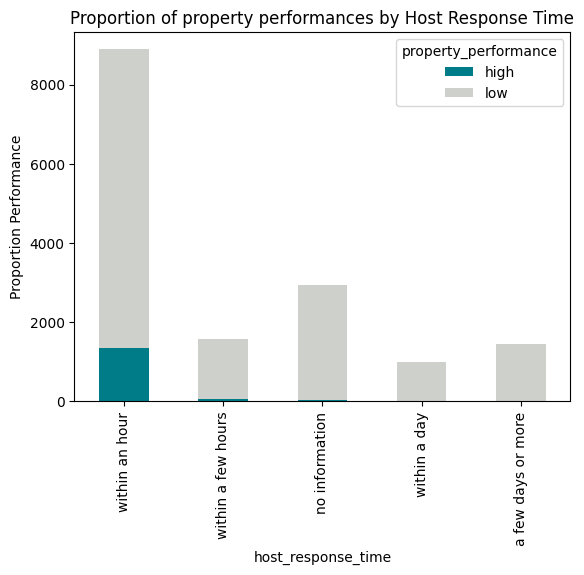

In [100]:
# creat barchart
ct_hrt.sort_values('high', ascending=False).plot(kind='bar', stacked=True, color=["#007b88", '#ced1cb'])

# set title
plt.ylabel(f'Proportion Performance')
plt.title('Proportion of property performances by Host Response Time');

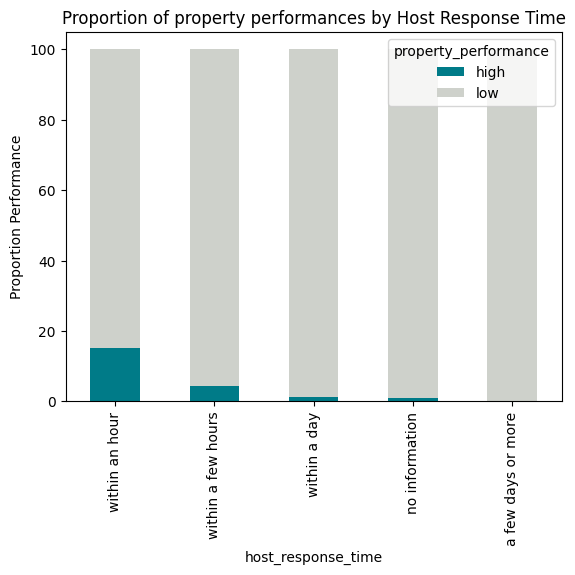

In [56]:
# creat barchart
ct_hrt_percent.plot(kind='bar', stacked=True, color=["#007b88", '#ced1cb'])

# set title
plt.ylabel(f'Proportion Performance')
plt.title('Proportion of property performances by Host Response Time');

In [92]:
# sunburst

fig = px.sunburst(
    bnb, 
    path=['host_response_time', 'property_performance'], 
    title=f'Proportion of Property Performance by Host Response Time', 
    width=600, 
    height=600
    )

fig.update_traces(textinfo="label+percent parent")  

fig.show()

In [57]:
#statistical check
from scipy.stats import chi2_contingency

stat, pvalue, dof, expexted = chi2_contingency(ct_hrt)

# conclusion
if pvalue<=0.05:
    print(f'Reject Ho \nhost_response_time and property performances is dependent\nThe Proportion is SIGNIFICANLY DIFFERENT')
else:
    print(f'Accept Ho \nhost_response_time and property performances is NOT dependent\nThe Proportion is SIGNIFICANLY NOT DIFFERENT')

Reject Ho 
host_response_time and property performances is dependent
The Proportion is SIGNIFICANLY DIFFERENT


* Statistically, host response time and property performance is dependent
* host who response 'within an hour' has most high-performance proportion

<Axes: xlabel='host_response_rate', ylabel='property_performance'>

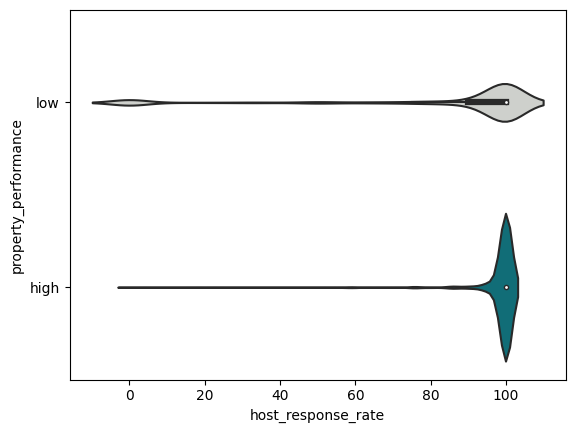

In [103]:
sns.violinplot(data=bnb, x='host_response_rate', y='property_performance', palette={'low':'#ced1cb','high':"#007b88"})

In [59]:
bnb.query("property_performance == 'high'")['host_response_rate'].quantile(0.1)

97.0

90% of high-performance host have >= 97% host response rate

In [60]:
# statistical test
from scipy.stats import mannwhitneyu

check = bnb[bnb['host_response_rate'].notnull()][['property_performance','host_response_rate']]

stats, pvalue = list(mannwhitneyu(
    check[check['property_performance'] == 'high']['host_response_rate'], 
    check[check['property_performance'] == 'low']['host_response_rate'],
    alternative = 'greater'
))

pvalue = pvalue/2
print('P-Value:', pvalue)

# conclusion
if pvalue<=0.05:
    print(f'Reject Ho \nMean host response rate of high-performance MORE THAN low-performance')
else:
    print(f'Accept Ho \nMean host response rate of high-performance EQUAL WITH single/couple')

P-Value: 1.0267419517212934e-58
Reject Ho 
Mean host response rate of high-performance MORE THAN low-performance


high-performance property host statistically have mean host_response_rate MORE THAN low performance property host

# `Conclusion & Recommendation`

## Conclusion
After doing the analysis, we can conclude that:
1. **How's the performance of Airbnb property in Bangkok?**
* Only 1471 (9.3%) property in Bangkok are high-performer

2. **How's the characteristics of high-performances property?**
* Most high-performance property coming from family accomodates type
* Most high-performance property coming from entire home/apt room type
* Most high-performance property are located near CBD of Bangkok
* Khlong Toei and Vaddhana is a neighbourhood that have most high-performance property
* Travellers are willing to pay more
* There are some differentiation between top facilities that are present in high-performance and low performance, *hot water* and *Dishes and silverware* are top facilities that present in high-performance but not in low-performance
* Most high-performance property response time is *within an hour*
* Host response rate from high-performance property host is higher than low-performance property host  
    
## Recommendation
* Prioritize to searching property that can provide family accommodates type, with entire home/apt room type
* Focus on searching property in the neighbourhood near with CBD and BMT Public Transport
* Don't afraid to set price above median price
* Ensure the property have all top 10 facilities that present in high-performances property, especially *hot water* and *Dishes and silverware*
* Maintain host response rate > 97%, with the response time of within an hour